## Homework Week 9, Heather Leighton-Dick

## 1.	Why is assuming normal data an important consideration when answering questions about probability?

Assuming normal data is important in probability because it allows us to make statistical inferences about outcomes based on how closely our data resembles the normal distribution.

## 2.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data.



In [47]:
import pandas as pd
import numpy as np

import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
belize_df = pd.DataFrame(belize_df)

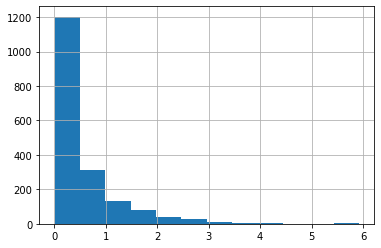

In [9]:
belize_df["reviews_per_month"].hist(bins=12)
plt.show()

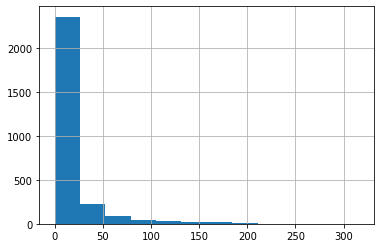

In [15]:
belize_df["number_of_reviews"].hist(bins=12)
plt.show()

### a.	How do you choose your bin size?
I plotted the data first, then looked at the distribution and chose a number that seemed to show the data to best advantage -- not too granular, but not too wide either.

### 3.	Create a box and whisker plot for availability_365. 

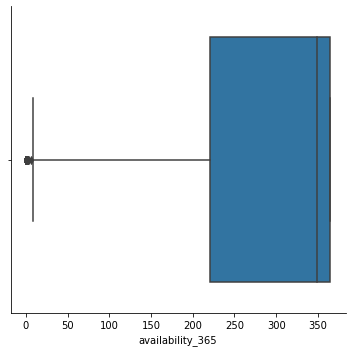

In [21]:
g=sns.catplot(x="availability_365", data=belize_df, kind="box")
plt.show()

### What does this show you?
It shows that the majority of availability counts are above 200 nights per year, and there are no outliers (and no whiskers) to the right of the box because there is no possible value above 365.

## 4.	What is the probability that the price for an Airbnb is under $50?



The probability that a person will end up with an Airbnb that costs under $50 is pretty small (1.3623364124386372e-92).

In [34]:
price_mean = belize_df["price"].mean()
price_std = belize_df["price"].std()

print(price_mean)
print(price_std)
print(poisson.cdf(50, price_mean))

357.1022889842632
563.1248245871559
1.3623364124386372e-92


In [55]:
price_under_50 = belize_df.loc[belize_df["price"] <= 50]
print(price_under_50)

            id                                           name    host_id  \
134    4005831  Home away from home,  Shared dormitory, NO AC    9315171   
148    4304743            DORMITORY Bed #1 of 6, on Maya Ruin    2084006   
172    4936432  Home away from home,  Shared dormitory, NO AC    9315171   
189    5509363                  Yaxche Jungle Camp, Dormitory    6960726   
196    5717367             Comfortable and Ecological Camping   29641332   
...        ...                                            ...        ...   
2521  44030397                       Bradley Family Home Stay  352893476   
2522  44031354                              Neria's Home Stay  352893476   
2524  44031844                            Andrade's Home Stay  352893476   
2765  48137798                             Ixora Apartment #2  121129838   
2782  48216307                   Almond Hill home with a view  389033375   

               host_name neighbourhood_group    neighbourhood  latitude  \
134         

### a.	What do you notice about these records? Hint: look at the other columns.

These records are all for beds in shared rooms or private rooms in houses shared with other people.

### b.	What distribution does this data most closely fit?

This discrete distribution is left skewed.

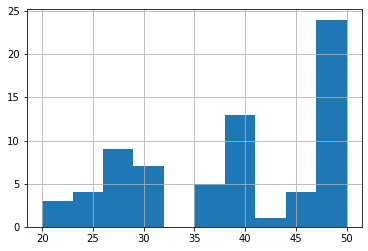

In [46]:
price_under_50["price"].hist()
plt.show()

## 5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 



In [83]:
# From price_under_50: price, availability_365, minimum_nights, number_of_reviews, calculated_host_listings_count

# sample variance
print("Sample Variance of Price: " + str(price_under_50.var()["price"]))
print("Sample Variance of Availability_365: " + str(price_under_50.var()["availability_365"]))
print("Sample Variance of Minimum Nights: " + str(price_under_50.var()["minimum_nights"]))
print("Sample Variance of Number of Reviews: " + str(price_under_50.var()["number_of_reviews"]))
print("Sample Variance of Host Listings: "+ str(price_under_50.var()["calculated_host_listings_count"]))

print("*******")
# standard deviation
print("Stnd Dev of Price: " + str(price_under_50["price"].std()))
print("Stnd Dev of Availability_365: " + str(price_under_50["availability_365"].std()))
print("Stnd Dev of Minimum Nights: " + str(price_under_50["minimum_nights"].std()))
print("Stnd Dev of Number of Reviews: " + str(price_under_50["number_of_reviews"].std()))
print("Stnd Dev of Host Listings: " + str(price_under_50["calculated_host_listings_count"].std()))


#price_std = belize_df["price"].std()

Sample Variance of Price: 96.20207039337477
Sample Variance of Availability_365: 17797.301035196688
Sample Variance of Minimum Nights: 55.042650103519655
Sample Variance of Number of Reviews: 755.2372670807453
Sample Variance of Host Listings: 20.404968944099384
*******
Stnd Dev of Price: 9.808265412058075
Stnd Dev of Availability_365: 133.4065254595767
Stnd Dev of Minimum Nights: 7.419073399254091
Stnd Dev of Number of Reviews: 27.481580505508507
Stnd Dev of Host Listings: 4.517185954120041


/var/folders/_g/ndr230vr8xj4_h001s7lzdlh0000gp/T/ipykernel_60308/3843322573.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Sample Variance of Price: " + str(price_under_50.var()["price"]))
/var/folders/_g/ndr230vr8xj4_h001s7lzdlh0000gp/T/ipykernel_60308/3843322573.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Sample Variance of Availability_365: " + str(price_under_50.var()["availability_365"]))
/var/folders/_g/ndr230vr8xj4_h001s7lzdlh0000gp/T/ipykernel_60308/3843322573.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeErro

### a.	Why sample variance and not population variance?

We used sample variance because we're working with a portion, or sample, of the entire Belize Airbnb data set where the price per night is $50 or less.

### b.	What is your takeaway for each metric?

Price: Both the sample variation and the stnd deviation are fairly high, indicating that the data are widely dispersed as compared to their mean.

Availability_365: Both sample variation and standard deviation are high, showing that the data are widely dispersed as compared to their mean. There are a lot of different values for this column rather than a few more common values.

Minimum Nights: As compared to data like Price and Availability 365, the variation and standard deviation are fairly low, indicating that this data is clustered a little more closely.

Number of reviews: Both sample variation and the standard deviation are very high, showing that there is a very wide dispersal of values.

Host Listings Count: As with Minimum Nights, the Host Listings Count variation and standard deviation are fairly low, showing that the data is a little more closely clustered. This is not surprising, though, since this is a measure of property owned, and the original numbers aren't as high as the rest.

### c.	What are the scales of measurement for each of these values? 

The sample variance is measured in square units of the original columns' value, so if a column of data has a unit of dollars, the sample variance is in dollars squared.
The standard deviation is measured in the same units as the original data.

Price: ratio

Availability_365: ratio

Minimum Nights: interval

Number of Reviews: interval

Host Listings Count: ratio


## 6.	What percent of Airbnb listings in Belize are available 360 days a year or more?



About 25.4% of Airbnb listings in Belize are available 360 or more days per year.

In [84]:
avail_mean = belize_df["availability_365"].mean()
print(avail_mean)
avail_std = belize_df["availability_365"].std()
print(avail_std)
#rows in belize_df = 2796
from scipy.stats import norm
percent360 = 1 - norm.cdf(360, avail_mean, avail_std)
print(percent360)


280.31545064377684
120.61763203006862
0.254422357908032


### a.	360 days or less?

About 74.6% of Airbnbs in Belize are available 360 days per year or less.

In [75]:
percent360less = norm.cdf(360, avail_mean, avail_std)
print(percent360less)

0.745577642091968


### b.	What distribution does this data most closely fit?

continuous uniform distribution

## 7.	What minimum night count are 75% of Airnbnb listings in Belize greater than?

75% of Airbnbs in Belize have minimum night counts greater than 3.

In [78]:
#min_night_mean = belize_df["minimum_nights"].mean()
#print(min_night_mean)
#min_night_std = belize_df["minimum_nights"].std()
#print(min_night_std)

#min_night_ct_75 = norm.ppf(0.25, min_night_mean, min_night_std)
#print(min_night_ct_75)

2.263948497854077
5.669843208294997
-1.5603026313597663


In [82]:
#numbers = belize_df["minimum_nights"].value_counts()
per75count = np.percentile((belize_df["minimum_nights"]), 75)
per75count

3.0

## Intro to Stats certificate

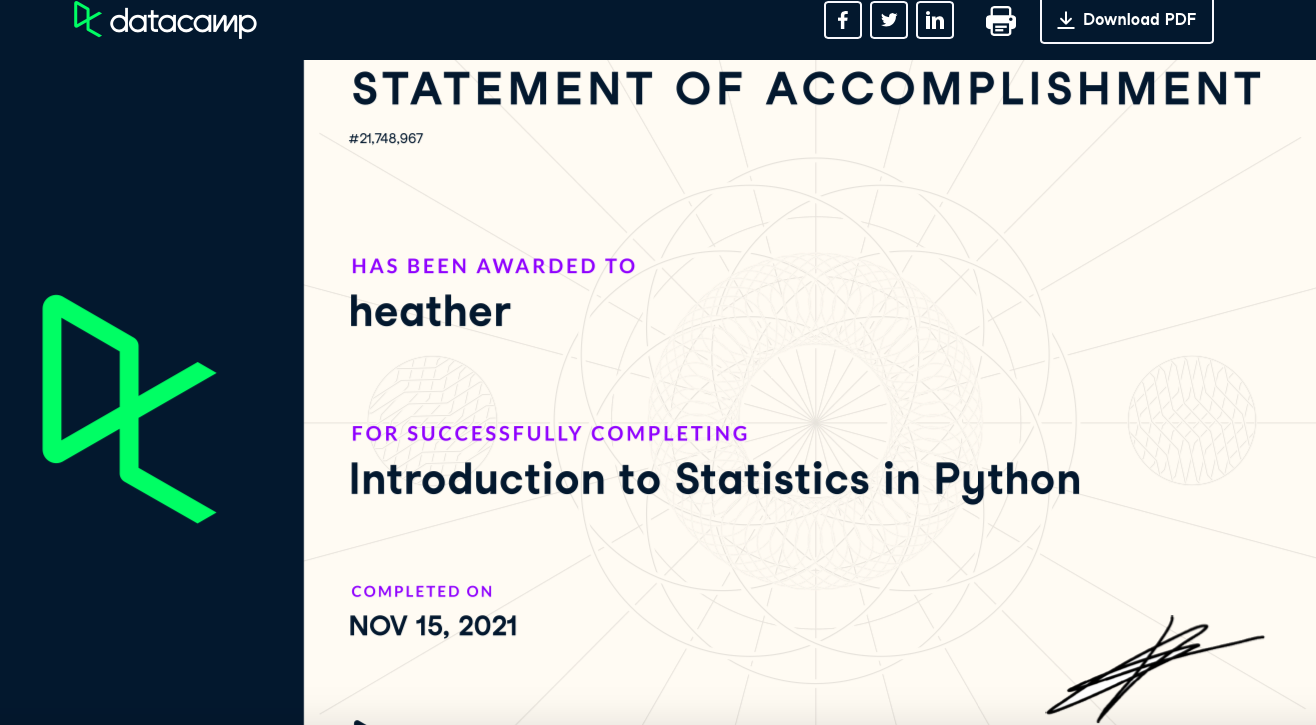